# Assignment 1:

<span style="color: navy;">In order to give the reader a nice overview of this notebook, we write all our answers and comments to the exercises in blue. <br> <br> If the reader wants to be able to run the notebook, they should save the dataset of crime incidents in their current folder under the name "Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv"</span>


In [1]:
# Importing relevant modules
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from scipy import stats
import astropy.stats
import folium
from folium import plugins
from folium.plugins import HeatMap

## Part 1: Visualizing patterns in the data

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 2. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

We look only at the focus-crimes in the exercise below.

> *Exercise*: 
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Make your own version of the plot and comment your results.
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight. Visualize and comment your results.
> * *Spatial patterns*. Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical:
>    - For each district plot the ratio `P(crime|district)/P(crime)` for the 14 focus crimes (follow and *show* the steps in Week 2 Ex. 2.2 for success).
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

In [2]:
#Downloading the data:
df = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

#Restricting to focuscrimes:
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']
df = df[df['Category'].isin(focuscrimes)]


> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Make your own version of the plot and comment your results.

In [3]:
#Formatting the data column:
df['Date_']= pd.to_datetime(df['Date'])
df['Year'] = df['Date_'].dt.strftime('%Y')
df['Weekday'] = df['Date_'].dt.dayofweek

#Restricting to entire years:
df = df[df.Year != '2018']

# Sorting data frame on weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=weekdays, ordered=True)
df = df.sort_values('DayOfWeek')

#Crimes per weekday: 
crimes_per_day = pd.DataFrame(df.groupby(['DayOfWeek','Category'])['IncidntNum'].count().reset_index())

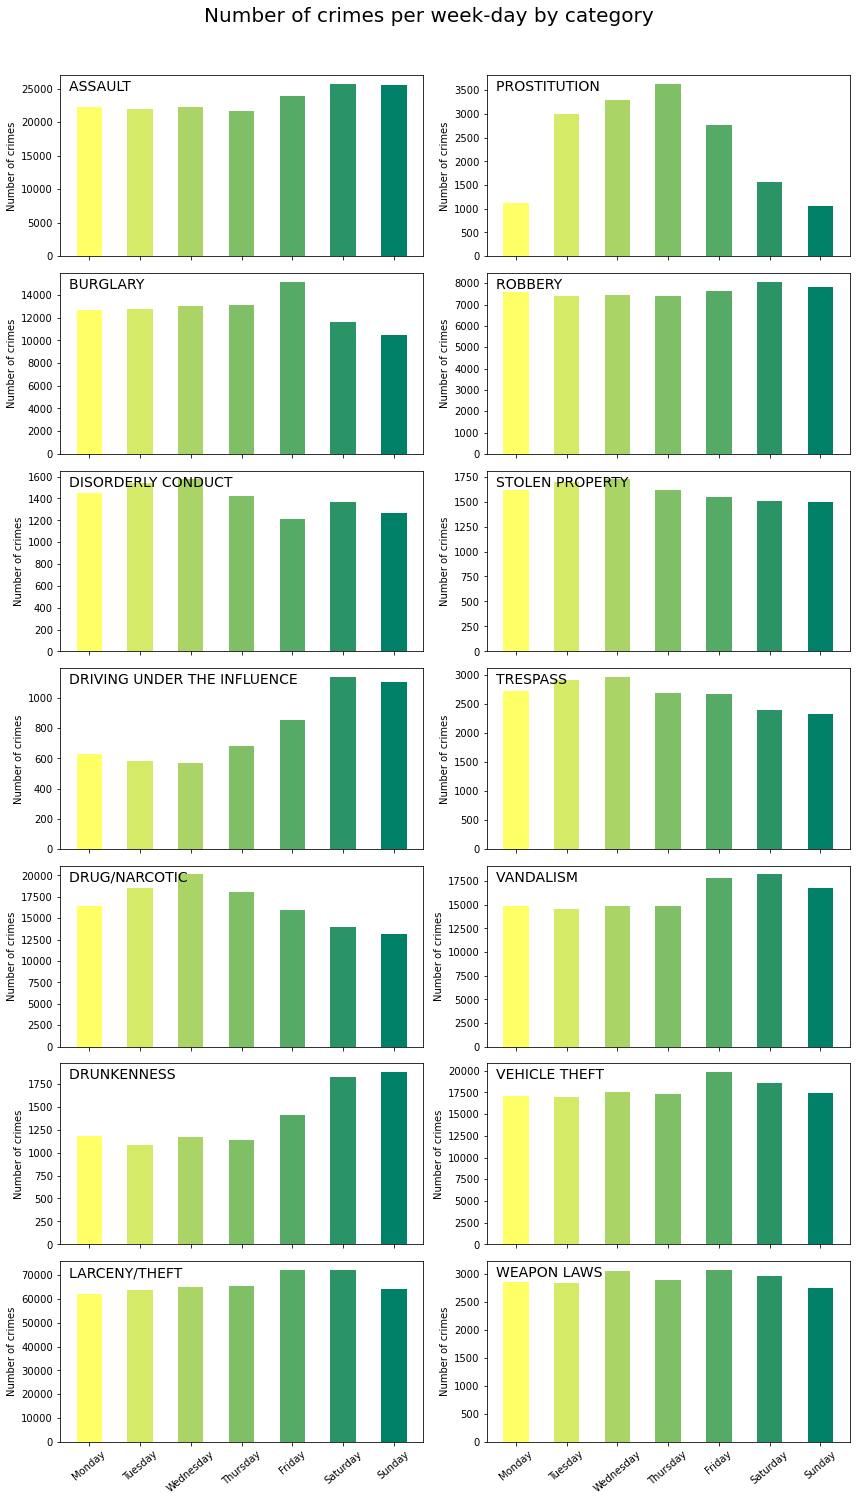

In [4]:
# Plotting data 

# Defining relevant parameters
cats = crimes_per_day.Category.unique()
n_days=len(set(df.DayOfWeek))

# Setting a color scheme
color = [matplotlib.colors.rgb2hex(plt.cm.summer_r((_num/(n_days-1))))\
                       for _num in range(n_days)]

# Creating subplots of crime occurreces each day of the week  
fig, ax = plt.subplots(7, 2, figsize=(12, 20), sharex=True)
for i, cat in zip(range(14), cats):
    if i < 7:
        axis=ax[i,0]
    if i>= 7:
        axis = ax[i-7,1]
        
    cat_df = crimes_per_day[crimes_per_day.Category==cat]
    # Setting parameters to make plots readable
    axis.set_title(('  '+cat),fontsize=14, y=0.88,loc='left')
    axis.bar(cat_df['DayOfWeek'], cat_df['IncidntNum'],width=0.5, align='center',color=color)
    axis.tick_params(axis='x', labelrotation = 40)
    #axis.set_xlabel('Days of the week',fontsize=10)
    axis.set_ylabel('Number of crimes',fontsize=10)
    fig.tight_layout()

fig.suptitle('Number of crimes per week-day by category',y=1.04,fontsize=20)
plt.show()

<span style="color: navy;">Based on the plots it is evident that some types of crime are more common during specific times of the week. There are, for example, more incidents of crimes realted to weapon laws, drunkness, robbery and disorderly conduct during the weekend, while more individuals are driving under the influence during Fridays. It is further evident that there are more incidents of theft and stolen property in the beginning of the week, while prostitution is happening in the middle of the week.</span>

> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight. Visualize and comment your results.

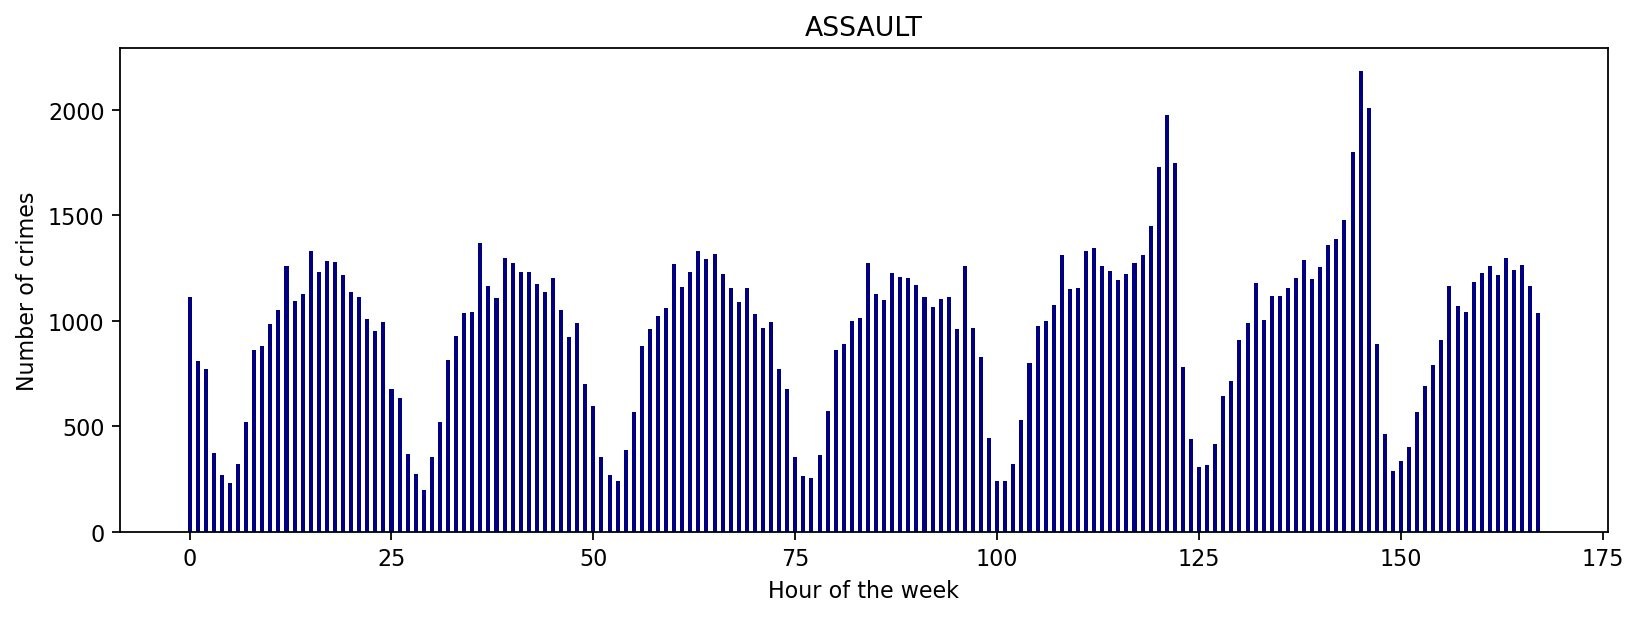

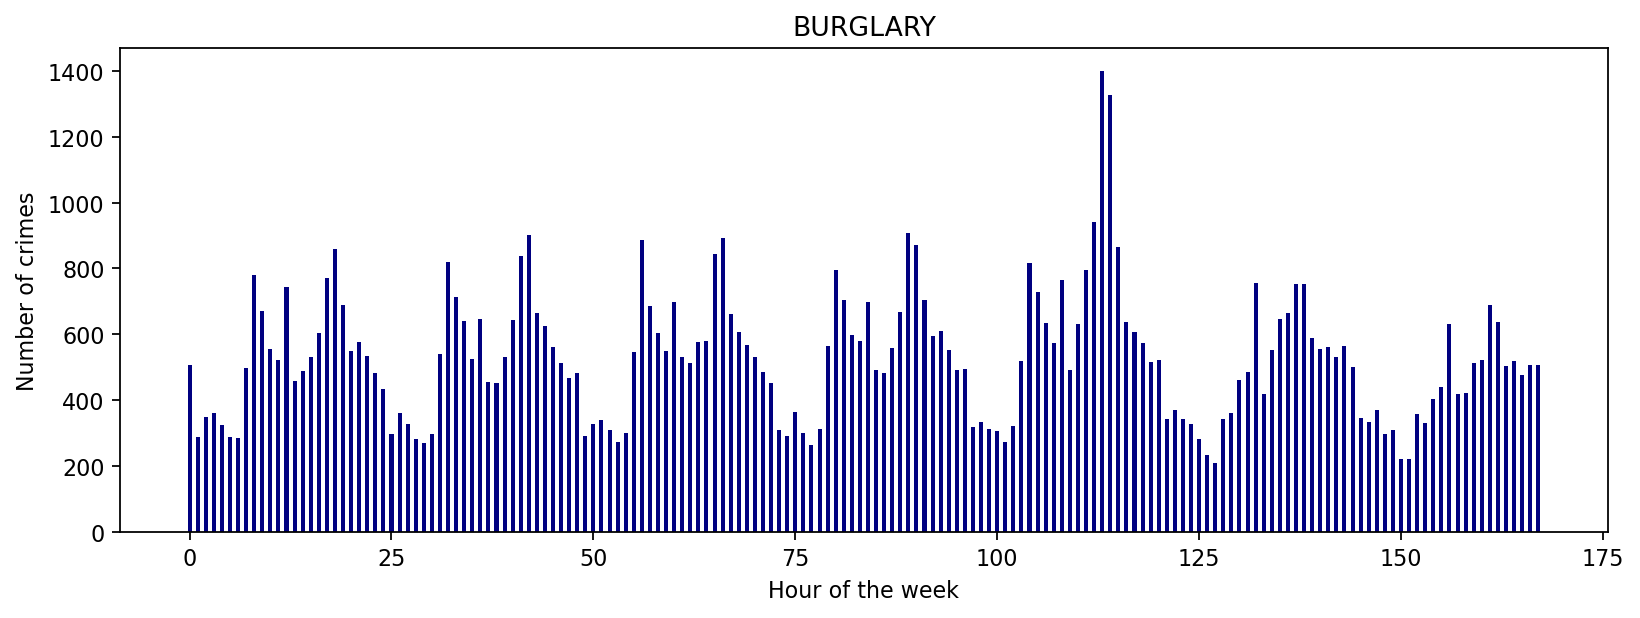

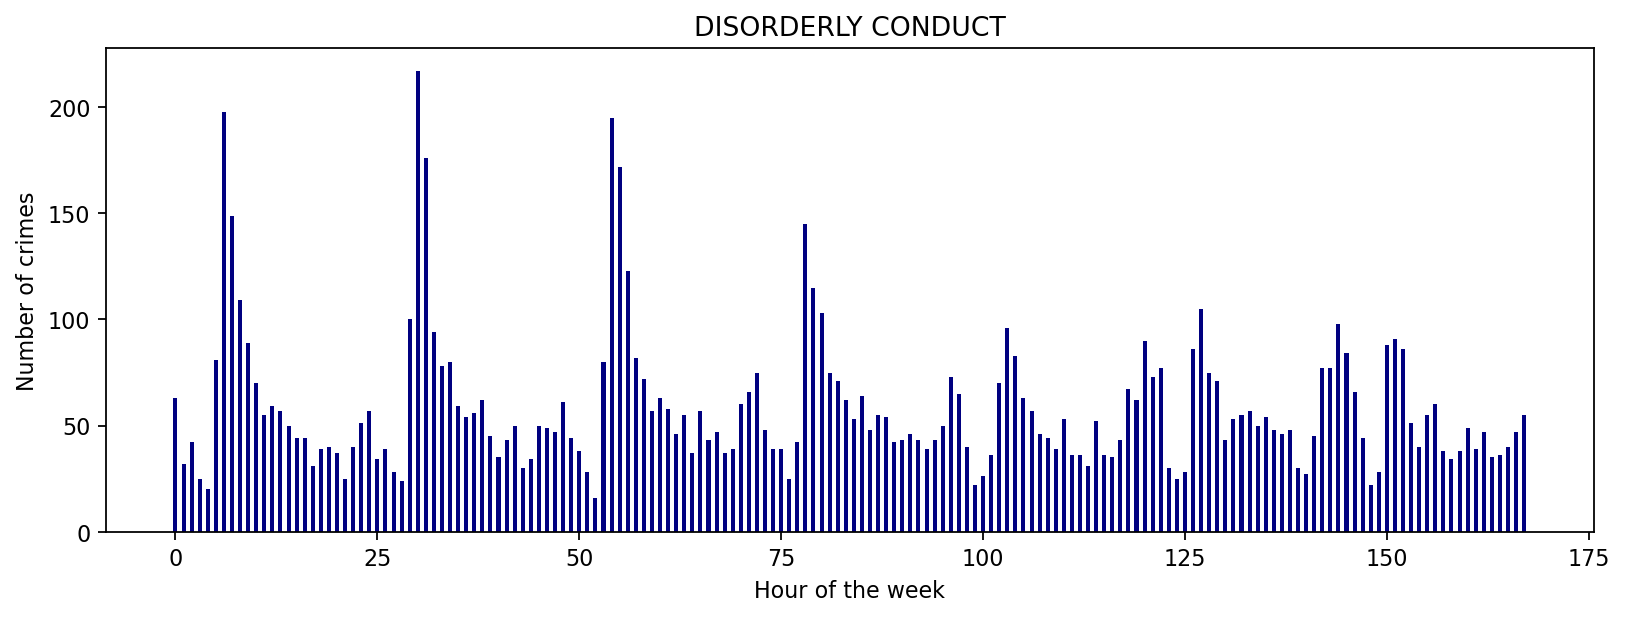

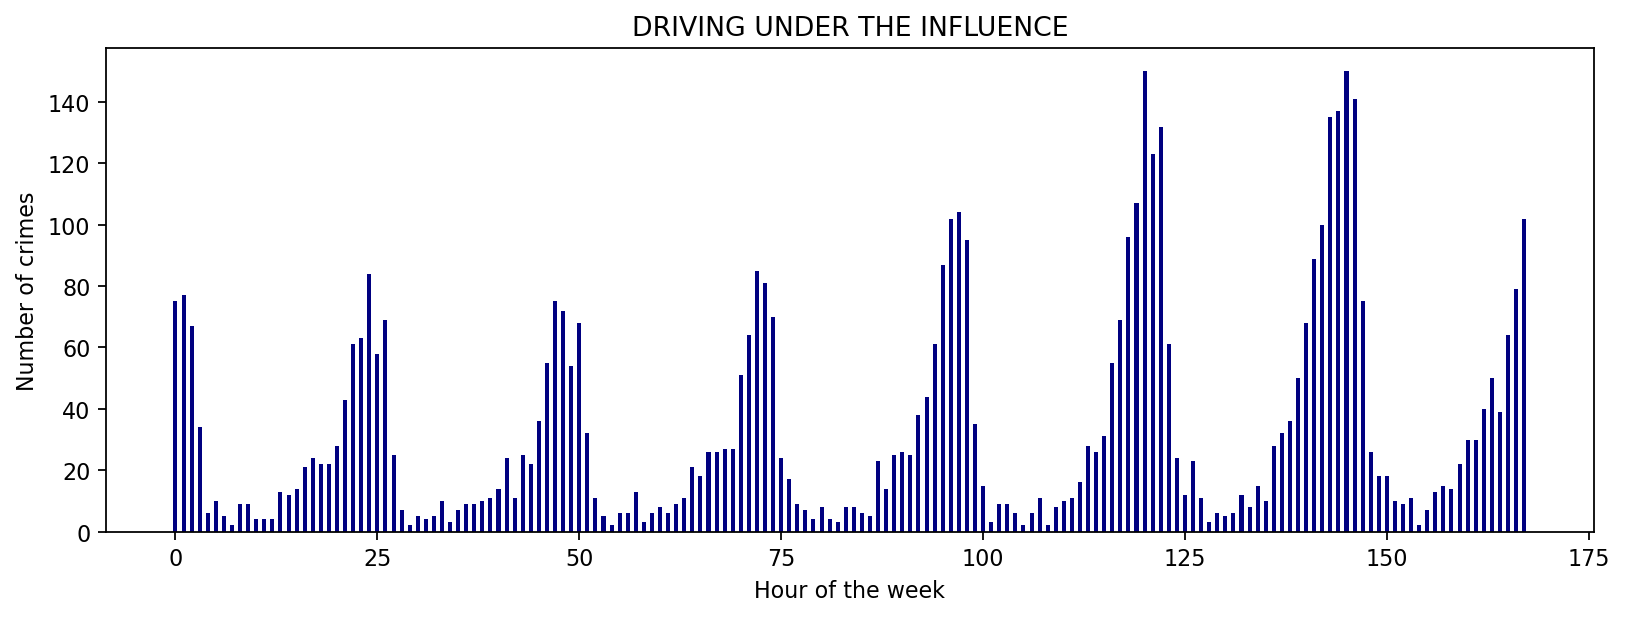

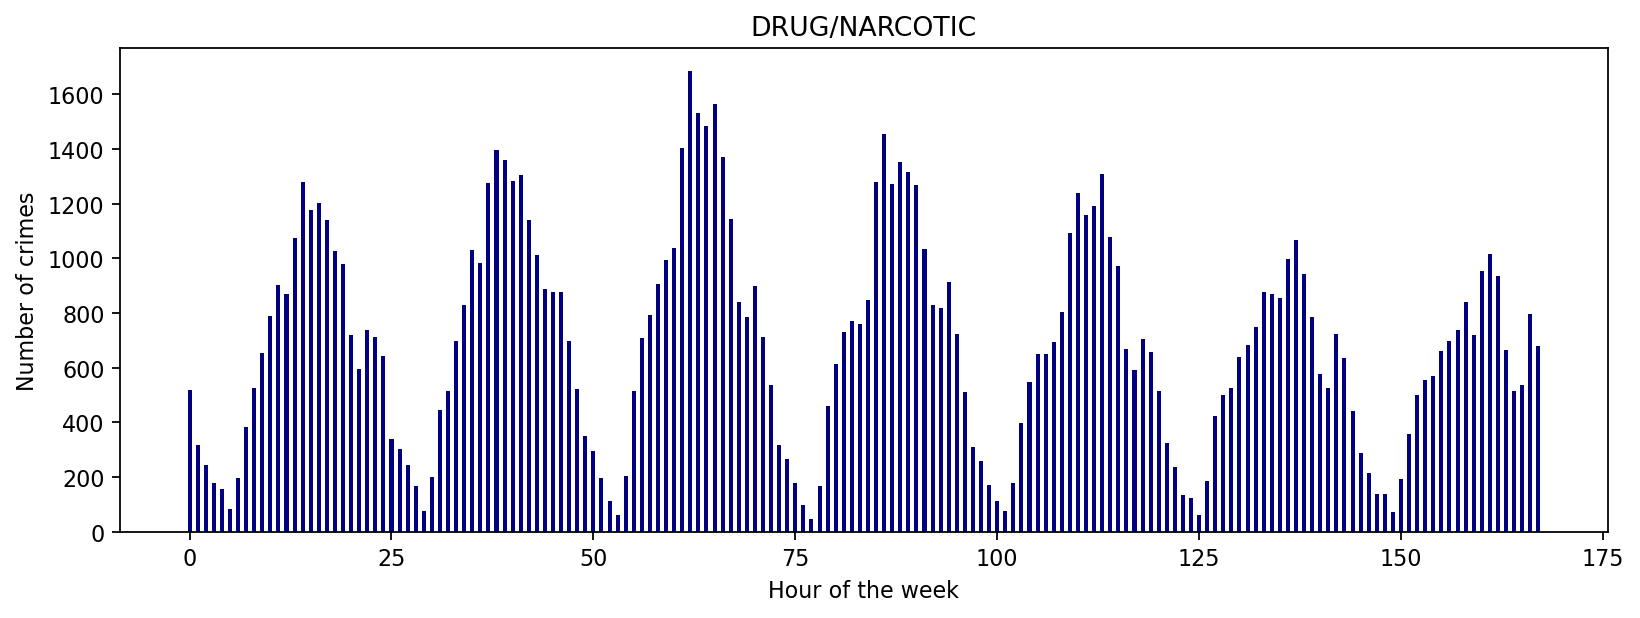

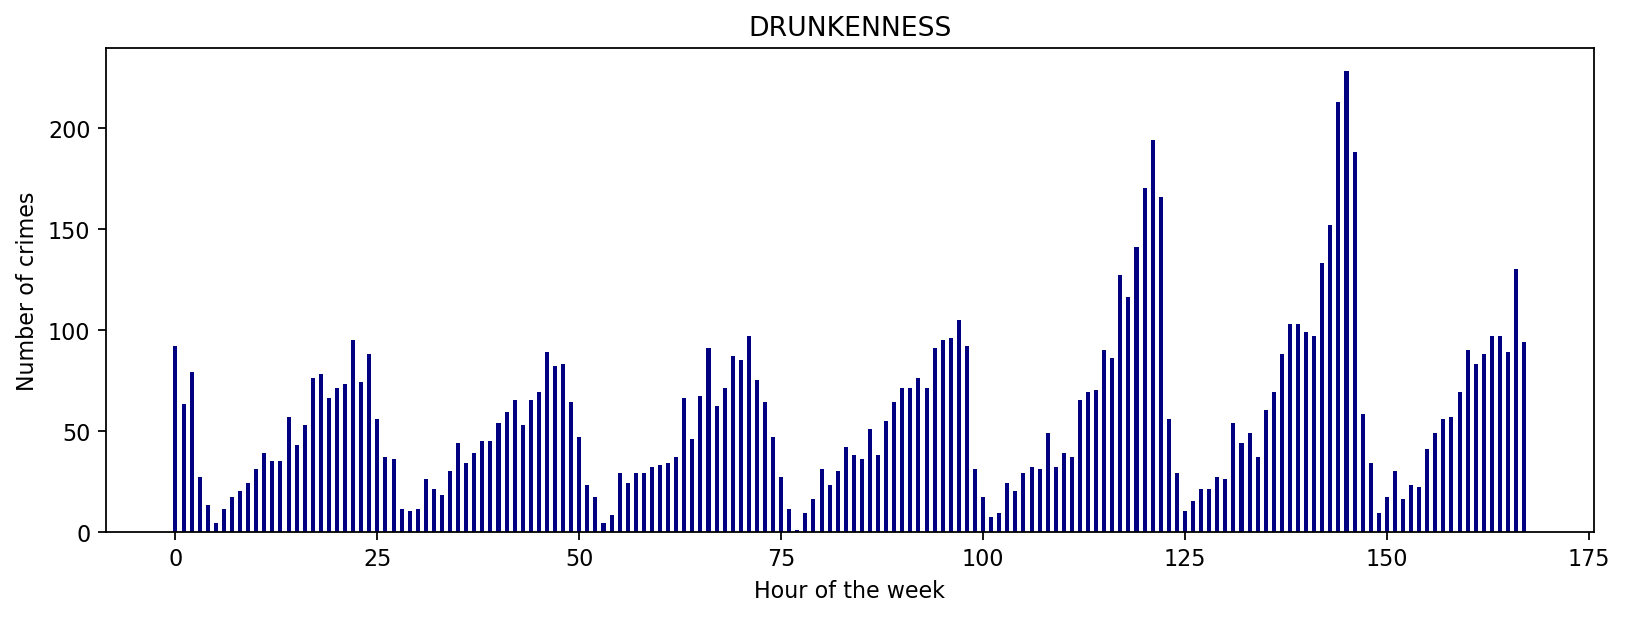

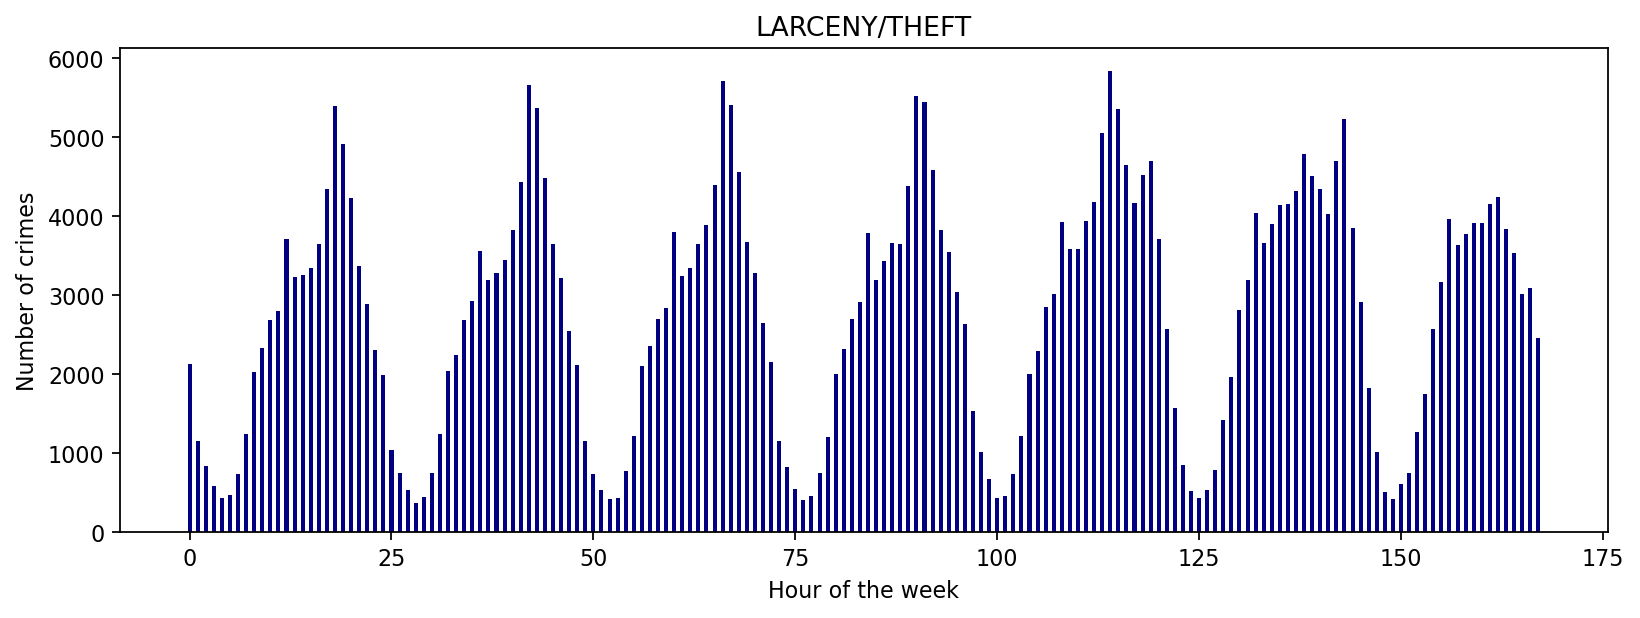

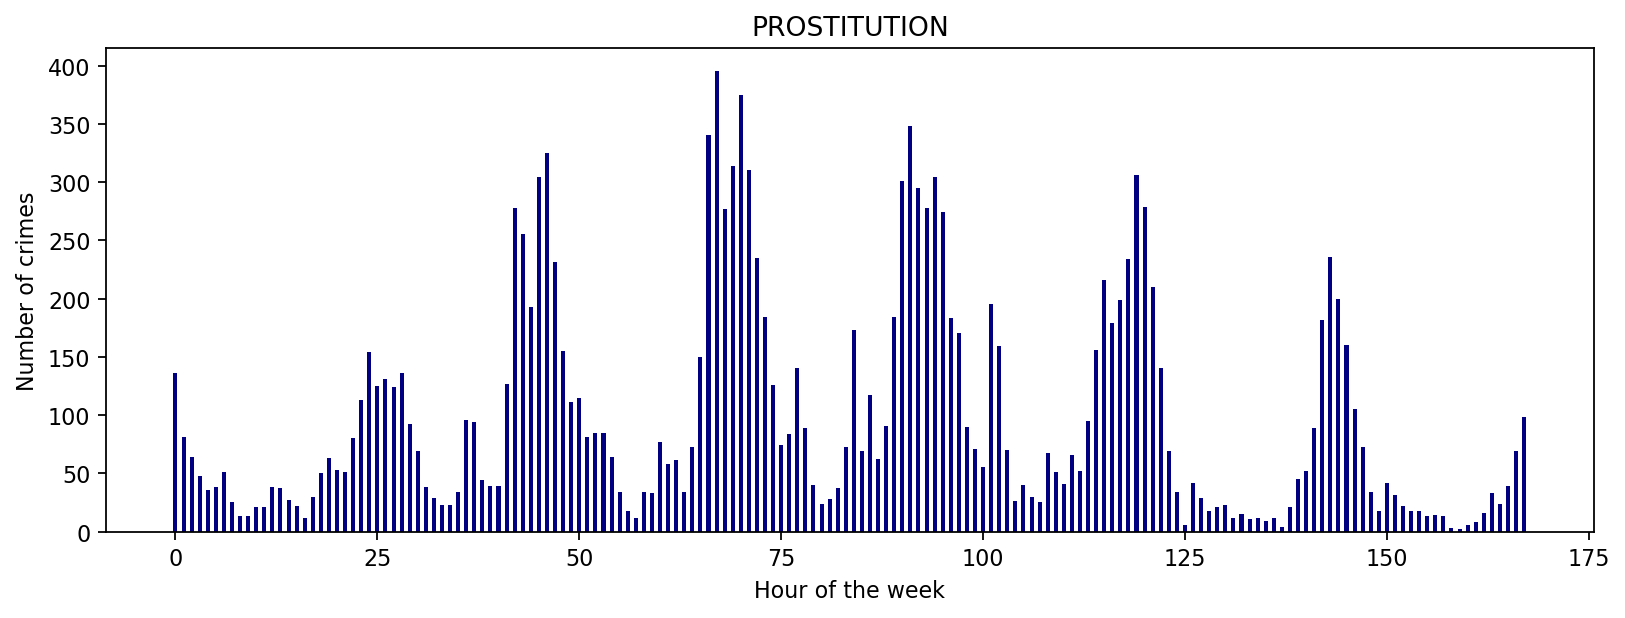

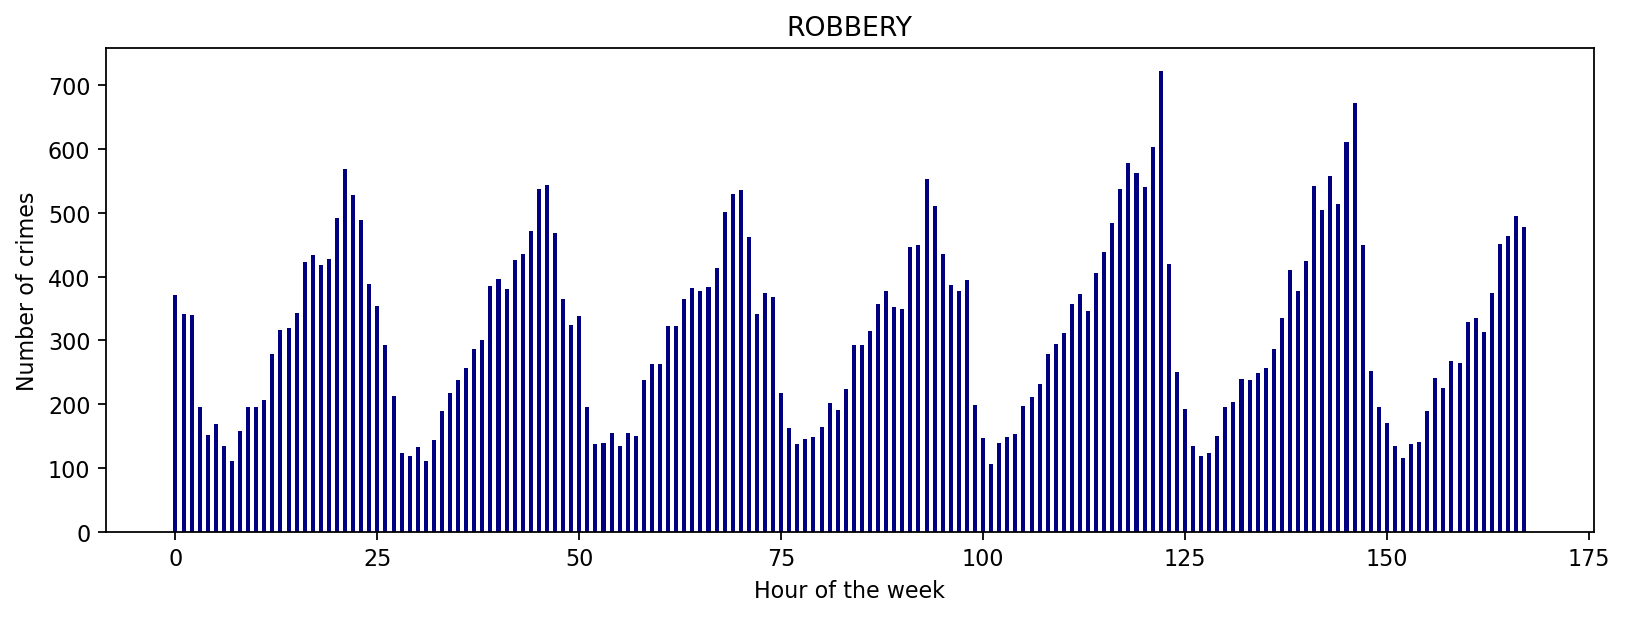

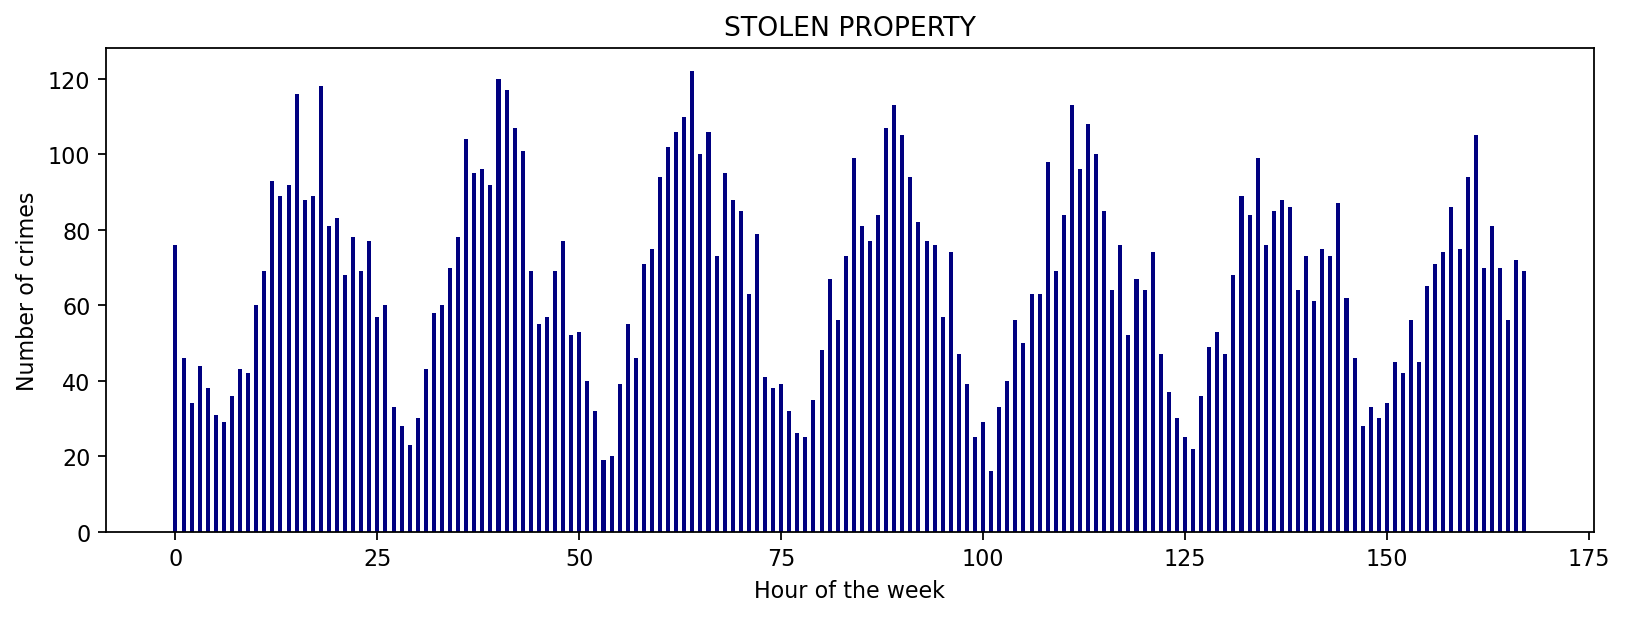

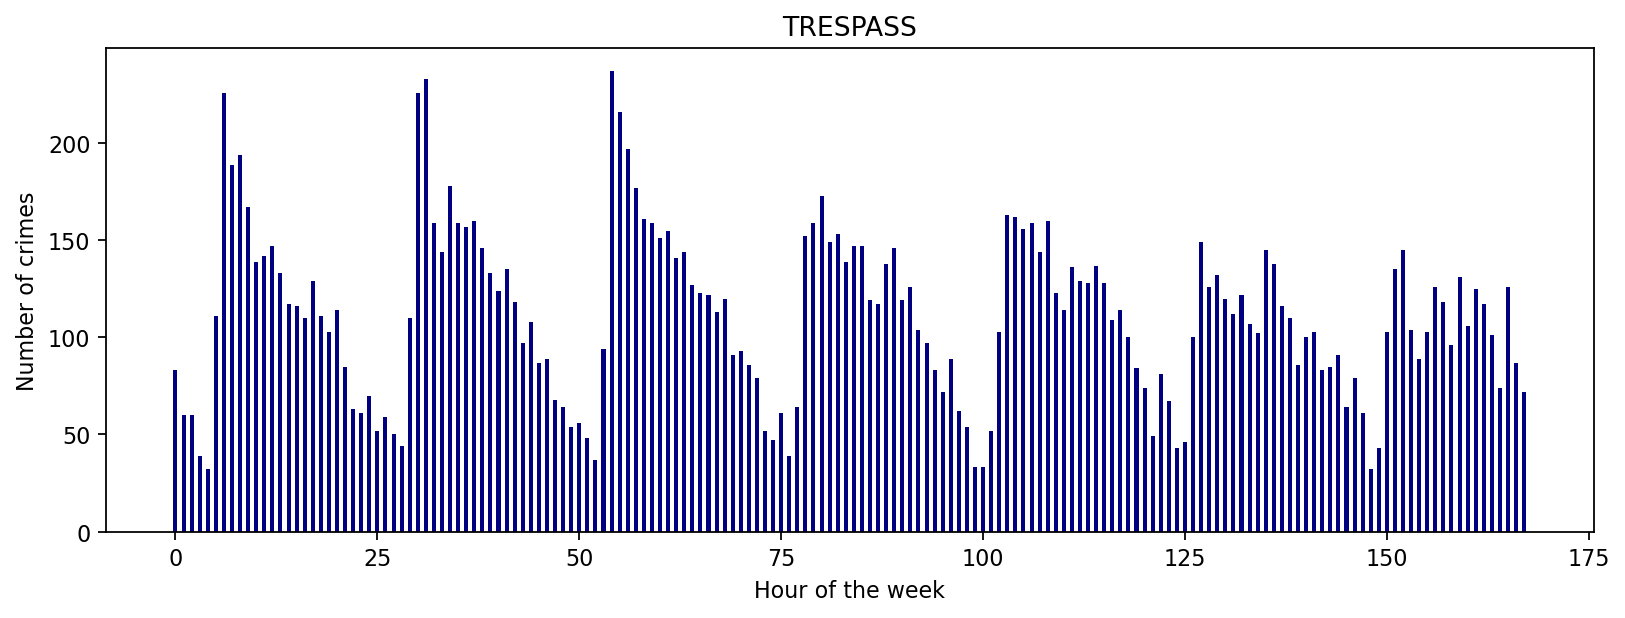

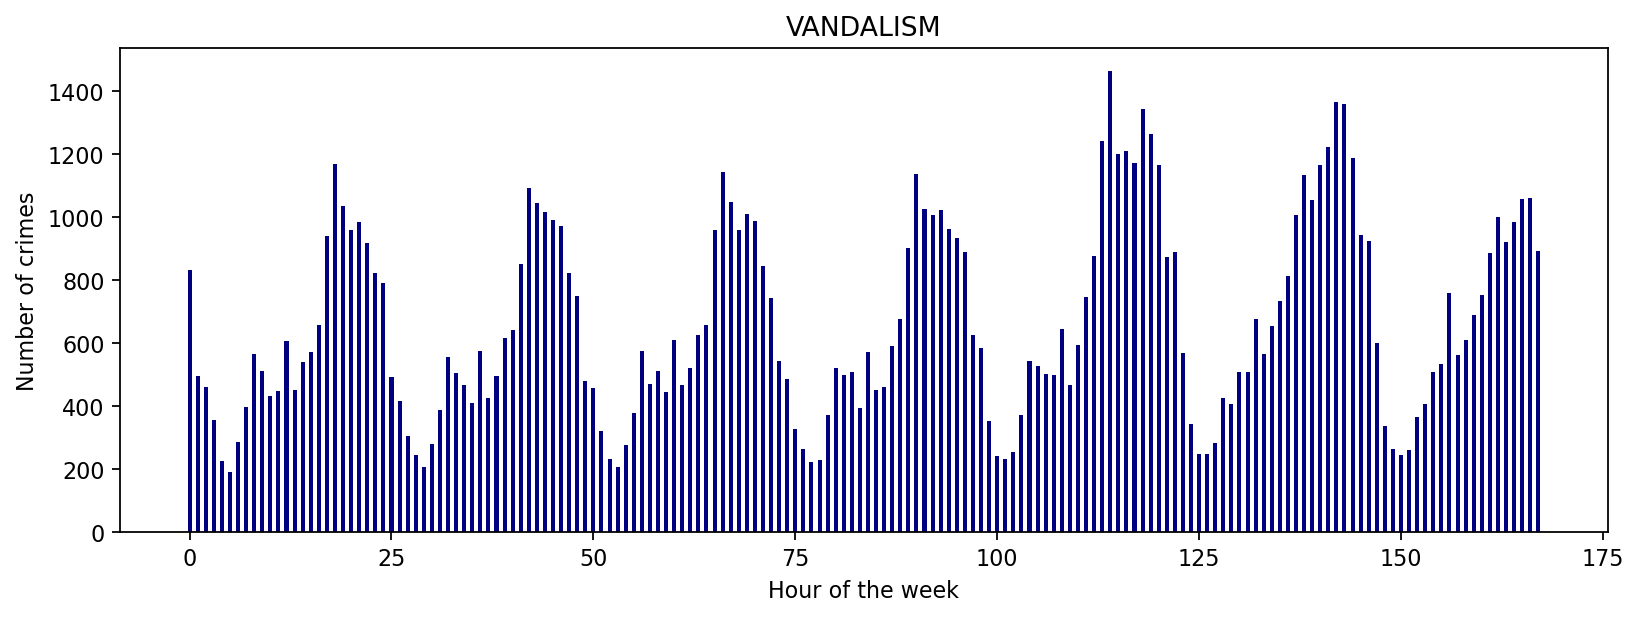

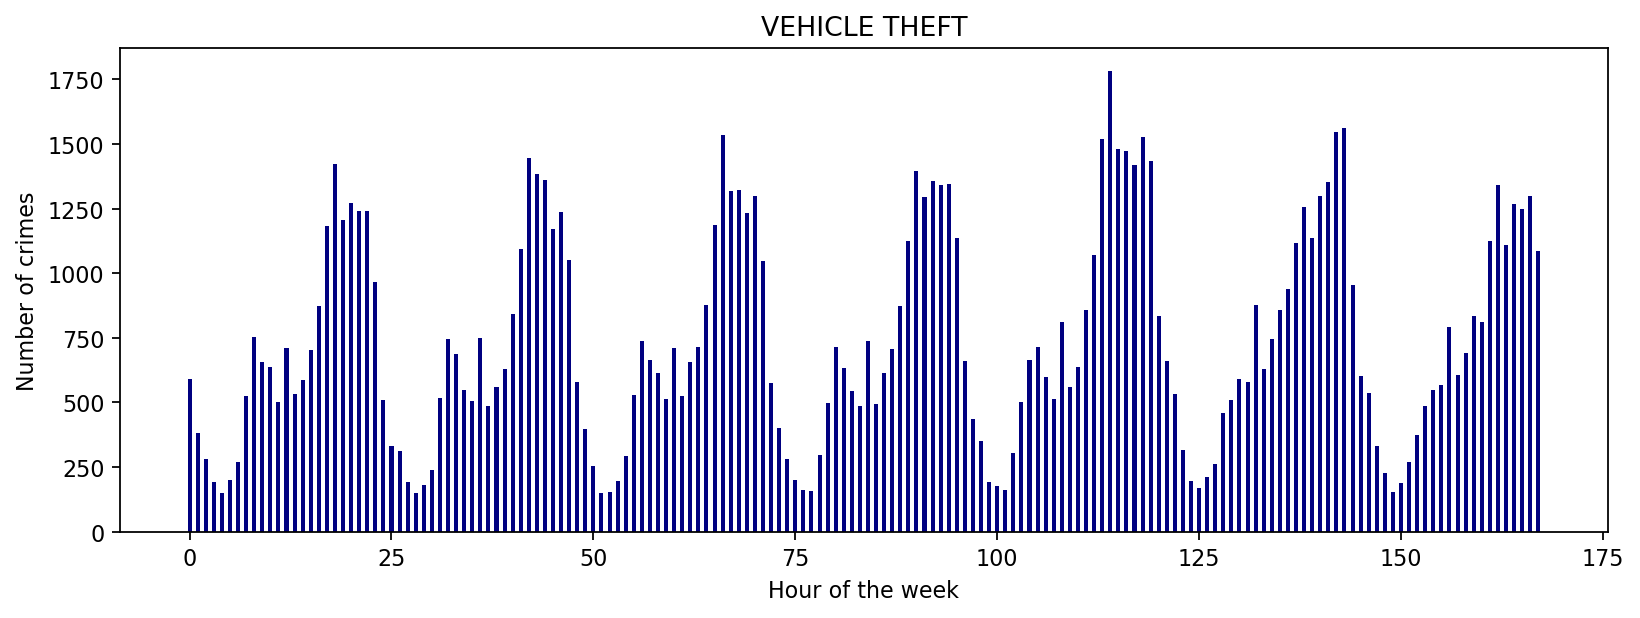

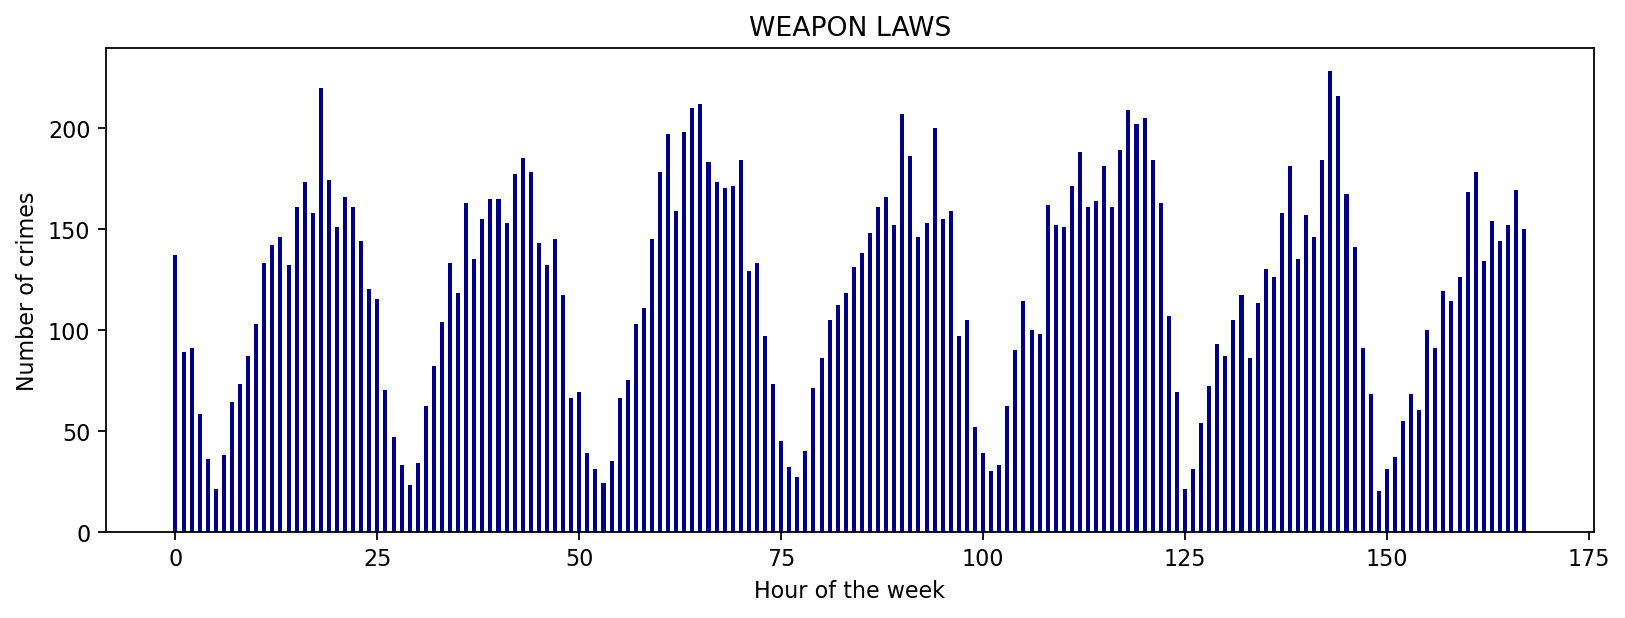

In [5]:
# Extracting hours from time variable
df['Hours'] = [x[:-3] for x in df['Time']]
#Grouping by weekdays, hours and categories:
per_hour = pd.DataFrame(df.groupby(['Weekday','Hours', 'Category'])['IncidntNum'].count().reset_index())
#Creating column with the 168 hours of the week:
per_hour.loc[:,'absHours']=(per_hour['Weekday'].astype(int)*24+per_hour['Hours'].astype(int))

# Looping over all categories and creating a plot for each:
cats = per_hour.Category.unique()
for cat in cats:
    cat_df = per_hour[per_hour.Category==cat]
    plt.figure(figsize=(12, 4), dpi=160)
    plt.title(cat)
    plt.bar(cat_df.absHours, cat_df.IncidntNum,width=0.5, align='center',color='navy')
    plt.xlabel('Hour of the week',fontsize=10)
    plt.ylabel('Number of crimes',fontsize=10)
    plt.show()

> * <span style="color: navy;"> We chose large seperate plots for each crime type to make the plots readable. Through the plots we find there is both a peak and a sharp drop during each day. These seem to resemble night and day. However, the peaks seem to be at different times of the day dependent of the crime types. Crimes like Trespassing and Stolen Properties happen earlier in the day. This might be because criminals often do this while victims are not at home. Furthermore, these crime types might look more suspecious if they are carried out during the night, so that might also be a reason why criminals do this during the day. <br> <br> Other crimetypes such as driving under Influence, Assault, and Drunkeness happen more currently in the late hours. This might be because they often occur while people are under influence (which is obvious for some of the crimetypes), and that is more often in the evening or at night people usually drink or do drugs.  </span>

> * *Spatial patterns*. Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical:
>    - For each district plot the ratio `P(crime|district)/P(crime)` for the 14 focus crimes (follow and *show* the steps in Week 2 Ex. 2.2 for success).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


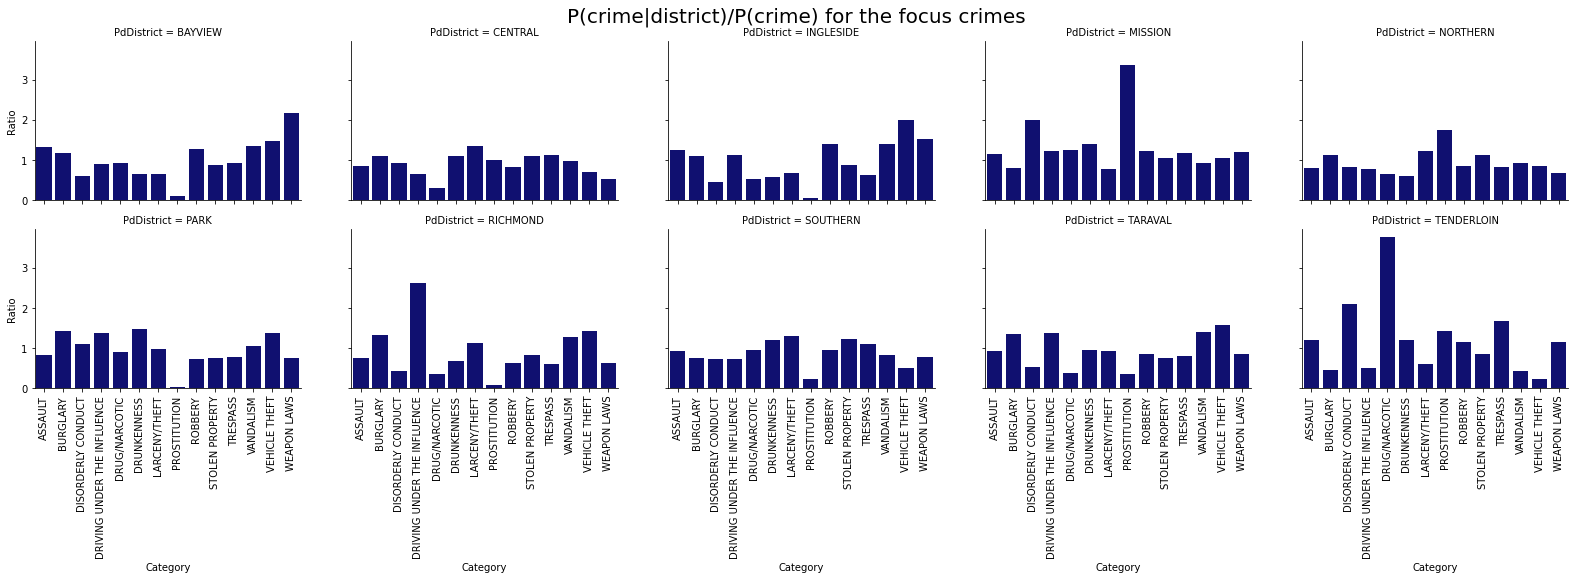

In [6]:
#Grouping by district and category to find P_crime per district:
departments_ = pd.DataFrame(df.groupby(['PdDistrict', 'Category'])['IncidntNum'].count().reset_index())
tot_dep = departments_.groupby('PdDistrict')['IncidntNum'].sum()

#Total incidents:
total_inc = departments_['IncidntNum'].sum()

#Grouping by number of incidents per department and finding P_crime:
category = (departments_.groupby('Category')['IncidntNum'].sum().reset_index())[['IncidntNum', 'Category']]
category['P_crime'] = category['IncidntNum']/total_inc
#Maps each crime to its probability in SF
crime_map = {cat.Category:cat.P_crime for row, cat in category.iterrows()}

#Computes P(crime|district)/P(crime)
def normalizeRow(row):
    return (row.IncidntNum/tot_dep[row.PdDistrict])/crime_map[row.Category]

#Applying function:
departments_.loc[:,'Ratio'] = departments_.apply(normalizeRow, axis=1)

#Plotting 
g = sns.FacetGrid(departments_, col="PdDistrict", height=3, aspect=1.5,col_wrap=5)
g.map(sns.barplot, "Category", "Ratio",color='navy')
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('P(crime|district)/P(crime) for the focus crimes', size = 20)
plt.show()

>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

> <span style="color: navy;"> We chose to place the plots closely together to make it easier for the reader to compare crime ratios across the districts <br><br>

<span style="color: navy;">
    
> - Tenderloin: According to Wikipedia crime in SF is a public health issue. The Tenderloin area has the highest crime rates (70%) with high frequencies of both drug abuse, gang violence and prostitution (Wikipedia contributors, 2022). The same tendencies are found through our plots, showing a high ratio of arrests related to drugs/narcotics and disorderly conduct (ibid). 

> - Mission: The Mission District has a high frequency of gang-activity such as drug-dealing, attacks and robberies (ibid). Through our plot it is evident that the Mission district overall has high ratios of all types of crimes, but especially prostitution and disorderly conduct. Disorderly conduct, also known as 'disturbing the peace' can to a high extend be related to the high prevalence of gangs in the area. 

> - Richmond: Richmond is, by contrast to the other districts, a district with lower ratios of crime. According to an article from Los Angeles Times, the Richmond district have traditionally been one of the districts with the lowest crime rates in SF (Scheier, 2022). Our plot show similar tendencies, where the most frequent crime type is 'driving under the influence'.

## Part 2: Fundamentals of data visualization

In the exercise below, there is a selection of questions from Week 3, Part 1. Please, check it out if you have any doubt on how to solve the exercise.

> * *Questions from the [lecture](https://www.youtube.com/watch?v=yiU56codNlI)*. Sune mentions in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 


<span style="color:navy">
    
> Choosing the right bin size can be tricky as too large bins result in information loss whereas too small bins create noise in the visualization. While there is no simple rule of thumb, *Scott's rule* for bin width can be a good place to start (Janert, 2010, p. 16). Here the optimal bin width is:

> $$w = \frac{3.5 \sigma} {\sqrt[3]{n}}$$

> where $\sigma$ is the standard deviation for the entire dataset and *n* is the number of points (Scott, 1979).

> This rule assumes the data follows a Gaussian distribution, otherwise it is likely to give a bin width that is too wide. We like this rule as a starting point and use it to test out various visualizations using different bin widths. While one could use bin widths of different sizes, we prefer all bins to be the same size to minimize the ambiguity in the visualization. 
</span>

> * *Hypothesis testing*. Use [data 1](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_f.csv) and [data 2](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_m.csv) to verify whether there is a statistically significant difference in the average number of steps taken by men and women. 

In [7]:
#Importing the data:
female = pd.read_csv('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_f.csv')
male = pd.read_csv('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data9b_m.csv')

 * Is there a statistically significant difference between the two groups? What is the difference between their mean number of steps? Plot two histograms to visualize the step-count distributions, and use the criterion you chose in the previous step to define the right bin-size and comment on your choice.

In [8]:
#calculating statistical measures in data
ttest, p_value = stats.ttest_ind(male['steps'],female['steps'])
mean_m = np.mean(male['steps'])
mean_f = np.mean(female['steps'])
print("t test: ", ttest, "\nP value: ", p_value, "\nmean steps male: ", mean_m, "\nmean steps female: ", mean_f, "\ndifference in mean steps: ", mean_m-mean_f)

t test:  5.539053975609961 
P value:  3.498915026461386e-08 
mean steps male:  7792.545232273838 
mean steps female:  6857.763157894737 
difference in mean steps:  934.7820743791017


<span style="color:navy">

> The **average number of steps taken by men** based on the given data is **7792.55** and the **average number of steps taken by women** is **6857.76**. Taking the **difference** between these two means gives us **934.78**. However simply this value doesn't give us enough information to understand whether or not we can truly say there is a difference in the average number of steps taken by men and women. <br> <br> To compare the average values of two datasets and determine whether or not they came from the same population, we need to conduct a t-test. A **t-test** incorporates not just the difference in means but also the standard deviation of each group, and the number of values. Conducting a t-test gives us a **test statistic *t* = 5.539** and a **p value of 3.4989e-08**. Since this p value is well below a significance of $\alpha$ = 0.05 we can reject our null hypothesis of the two datasets having been drawn from the same population and conclude that **there is in fact a statistically significant difference between the average number of steps taken by men and women**.   


In [9]:
#testing out bin size
print(astropy.stats.scott_bin_width(male['steps']))
print(astropy.stats.scott_bin_width(female['steps']))

1159.8592241534948
1378.9270189163126


<span style="color:navy">
    
> We chose Scott's rule to define bin width. Since we saw there is a statistical difference between the two datasets we first calculated optimal bin width for each dataset. This gave us a bin width of 1159.86 for men and 1378.93 for women. In order to allow for ease in comparison across the two histograms, we decided to use the same bin width for both plots. Thus we set the bin width to be 1200. 

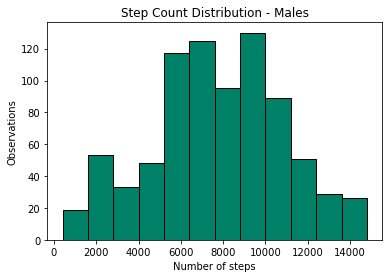

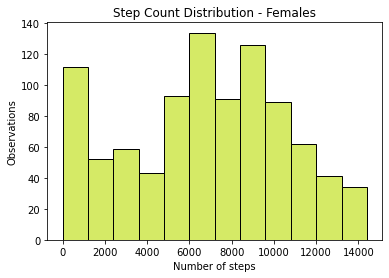

In [10]:
#selecting a "round" number width between the two suggested bin widths so as to have the same bin width
#for both graphs
w=1200

#male
plt.hist(male['steps'], color = '#008066', edgecolor='black', bins=np.arange(min(male['steps']), max(male['steps']), w))
plt.title('Step Count Distribution - Males')
plt.xlabel("Number of steps")
plt.ylabel("Observations")
plt.show()

plt.hist(female['steps'], color = '#d5ea66', edgecolor='black', bins=np.arange(min(female['steps']), max(female['steps']), w))
plt.title('Step Count Distribution - Females')
plt.xlabel("Number of steps")
plt.ylabel("Observations")
plt.show()

<span style="color:navy">


> We also tested out setting up bin count instead and plotted the histograms with 10 and 15 bins (seen below). We found 15 bins to be a bit too granular and 10 bins resulting in a bit too smooth of a graph. Thus we see that Scott's rule is a good way to define bin sizes. In all three options, it is still apparent that the distrbution of steps taken by men and women is different, especially when considering the first bin that shows there are many more women who average less than 2000 steps than there are men. 
</span>

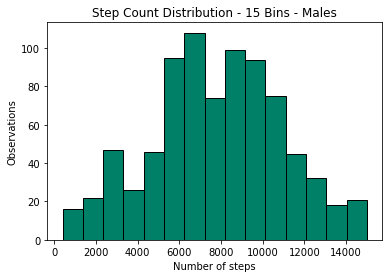

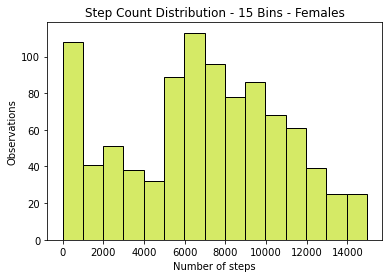

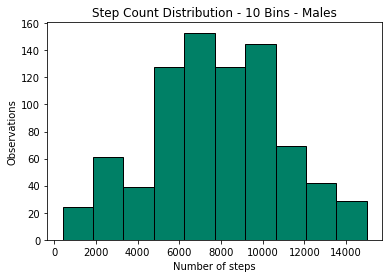

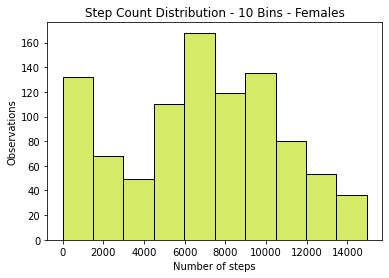

In [11]:
plt.hist(male['steps'], color = '#008066', edgecolor='black', bins = 15)
plt.title('Step Count Distribution - 15 Bins - Males')
plt.xlabel("Number of steps")
plt.ylabel("Observations")
plt.show()
plt.hist(female['steps'], color = '#d5ea66', edgecolor='black', bins=15)
plt.title('Step Count Distribution - 15 Bins - Females')
plt.xlabel("Number of steps")
plt.ylabel("Observations")
plt.show()
plt.hist(male['steps'], color = '#008066', edgecolor='black', bins = 10)
plt.title('Step Count Distribution - 10 Bins - Males')
plt.xlabel("Number of steps")
plt.ylabel("Observations")
plt.show()
plt.hist(female['steps'], color = '#d5ea66', edgecolor='black', bins=10)
plt.title('Step Count Distribution - 10 Bins - Females')
plt.xlabel("Number of steps")
plt.ylabel("Observations")
plt.show()

>Pretend you did not visualize the data yet. What was the explanation you found for what you observed? Explain the theory, news, papers, further analysis etc. you used to support your conclusions and write down a couple of sentences. Now, think of the actual shape of the data: what do you think the point of this exercise was? 

<span style="color:navy">
    
> Here we were interested in understanding whether there was a statistically significant difference in the average steps taken by men and women. Our t-test gave us a statistically significant p value and thus we could conclude that there was in fact a difference in the average steps taken by men and women. This is also supported by studies that have found females of all ages to be less active than their male peers (University of Exeter, 2009). However reality is more nuanced than this and we see this as we start to visualize our data. Even just plotting histograms shows that it's not necessarily women across the board who are less active then men but that there are just a lot of women who walk less than 2000 steps a day, thereby skewing the summary statistics. The point of the exercise is to highlight the value in data visualization and also in keeping an open mind. Once we adopted a more explorative approach, we also found theories and papers supporting the nuanced nature of this question. Studies found that the gaps in activity across gender start to decrease when looking at countries with low levels of obesity (Abate, 2017). 
</span>

> * *Scatter plots.* Create a scatter plot with both data samples by using **your own alternative** to `color='#f6756d'` and `color='#10bdc3'`. Explain why you chose this visualization, its pros, and cons.

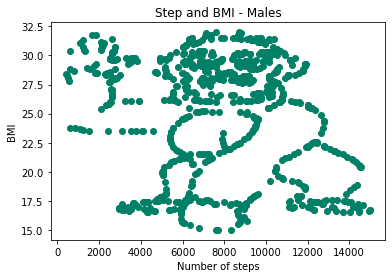

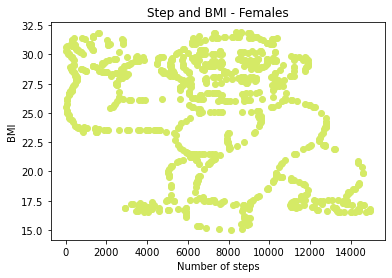

In [12]:
#Males:
plt.scatter(male['steps'],male['bmi'], c='#008066')
plt.title('Step and BMI - Males')
plt.xlabel("Number of steps")
plt.ylabel("BMI")
plt.show()

#Females:
plt.scatter(female['steps'],female['bmi'], c='#d5ea66')
plt.title('Step and BMI - Females')
plt.xlabel("Number of steps")
plt.ylabel("BMI")
plt.show()

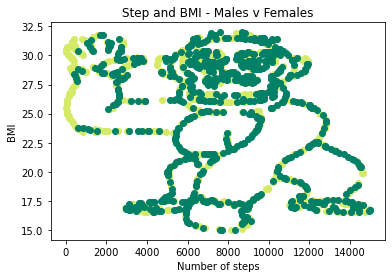

In [13]:
#Combined plot showing the difference between the plots above:
ax = plt.gca()
ax.scatter(female['steps'],female['bmi'], c='#d5ea66')
ax.scatter(male['steps'],male['bmi'], c='#008066')
plt.title('Step and BMI - Males v Females')
plt.xlabel("Number of steps")
plt.ylabel("BMI")
plt.show()

<span style="color:navy">
    
> A scatterplot is a great visualization choice when there are two variables of interest and we want to understand the relationship between them. While we are able to see trends from the histogram, especially more so than summary statistics like a t-test would offer us, in the case where we have step data and BMI, it makes more sense to explore a scatterplot. Thus the biggest pro is that a scatterplot allows us to see more patterns. This is further proven by the plots here that show a gorilla pattern in the data. Some cons for scatterplots include that they don't give us the quantitative measures of our variables and that our variables have to be continuous.
    <br>
    <br>
> More specifically, we chose to try visualizing our data on two separate scatterplots and also on the same one. We matched the colors to those used in the histogram. Plotting the data separately allows us to more clearly see that both datasets follow the same pattern. However plotting them on the same chart highlights were exactly the differences are.  
</span>

## Part 3: Different types of visualization from DAOST

The exercise below, is a selection of questions from Week 3, Part 2 and 3.

Questions from DAOST*

Janert, the author of DAOST, is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better. 

<span style="color:navy">
    
> - Janert emphasizes that summary statistics such as mean and median only apply under certain assumptions and are misleading. If the data distribution is not unimodal, that is if the distribution doesn't have a single, central peak, then the conclusions based on simple summary statistics will be wrong. One has to be especially careful because the numbers will actually look quite reasonable and thus it is quite easy to make a mistake. 
    <br>
    <br>
 > - Medians are typically more flexible and robust than means but in order to understand the data more thoroughly, visualizing is always better. A boxplot or a histogram allows us to better understand potential peaks, trends, and outliers in the data. Box plots combine many different measures of distribution into a single compact graph and emphasize the overall structure of the dataset. 
</span>

Explain what is a box plot. When are box plots most useful? Are violin plots better or worse than box plots? Why?

<span style="color:navy">
    
> - A box plot is a graphical way to represent the distribution and stucture of a dataset. It consists of:
<br>
    
>> - A *marker* for the median as an indicator of the location of the distribution
>> - A *box* spanning the inter-quartile range as a measure of width of the distribution 
>> - A set of *whiskers* as an indicator of the tails of the distribution 
>> - Individual *symbols* as a representation for outliers
    

> - Box plots are especially useful when we want to see whether the data distribution is symmetric or not and how the weight is distributed between the central peak and the tail. Additionally, box plots make it easy to compare multiple datasets based on their location and width. 

>  - A violin plot is similar to a box plot, except there are kernel density plots on the sides instead of the rectangular shape of the box. Thus violin plots are more informative than a plain box plot because in addition to visualizing summary statistics, they also show the full distribution of the data. This difference is particularly useful when the data distribution is multimodal. However, despite this, violin plots are less popular than boxplots and thus their meaning can be harder to grasp for people who aren't as familiar. As such we would say box plots are better because they're more intuitive while still offering a lot of information. 
    
</span>  

> * *Recreating plots from DAOST*. We need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined in Part 1.
>     * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>     * Create a box and whiskers plot showing the mean, median, quantiles, etc. for all 15 crime-types side-by-side. What does this plot reveal that you can't see in the plots from previous weeks?

In [26]:
#Grouping by day and category to get the number of crimes per day:
crimes_per_day = pd.DataFrame(df.groupby(['Date','Category'])['IncidntNum'].count().reset_index())

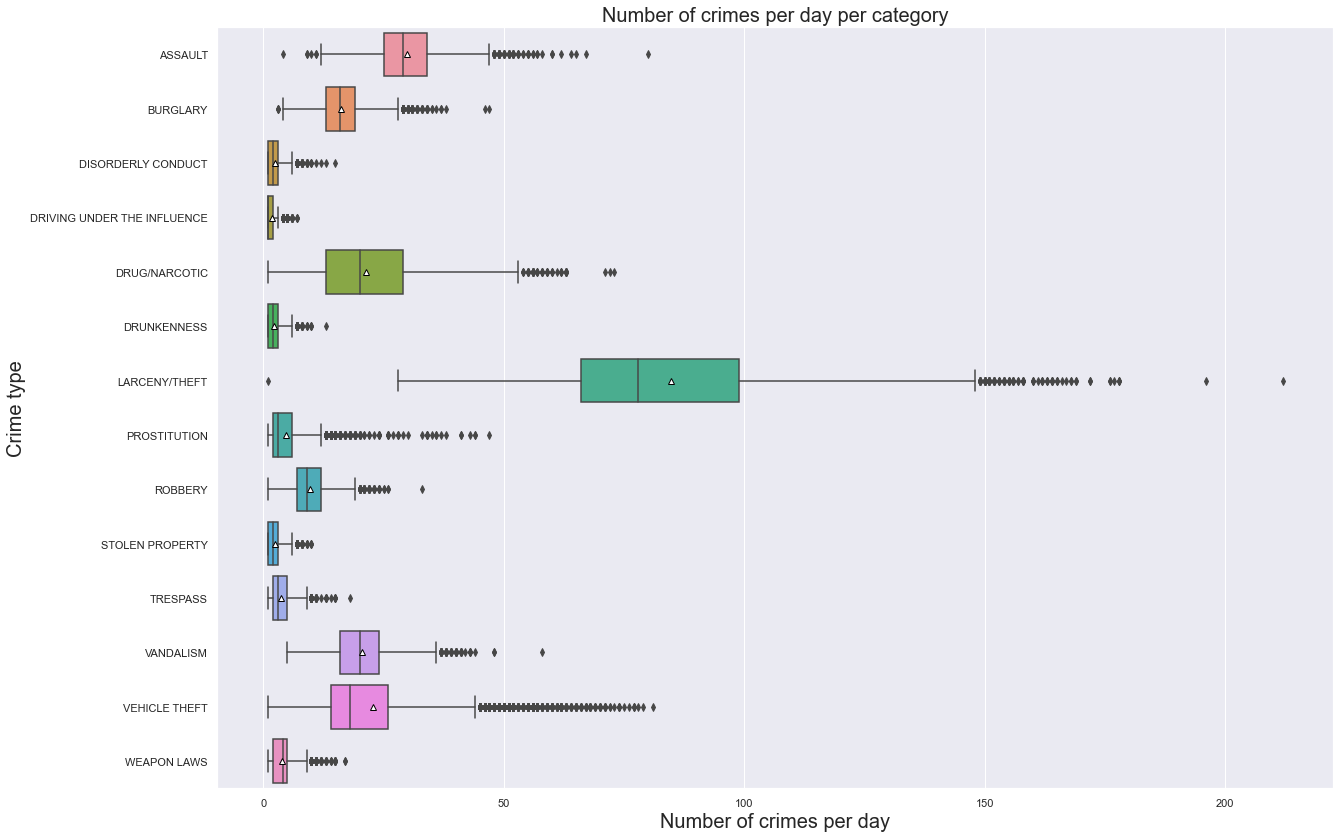

In [29]:
#Boxplot for all 15 crime types:
ax = sns.boxplot(x="IncidntNum", y="Category", data=crimes_per_day, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
ax.set_title('Number of crimes per day per category',fontsize=20)
ax.set_xlabel('Number of crimes per day',fontsize=20)
ax.set_ylabel('Crime type',fontsize=20)
sns.set(rc = {'figure.figsize':(20,14)})
plt.show()

<span style="color: navy;">

> - Through the boxplots we get an overview of the variability in frequency of the different types of crime and the varying structure of the data across different crime categories. We're quickly able to see that Larceny/Theft is the most commonly occuring crime. Plotting the mean also helps us see which crimes have certain days where the frequency is unordinarily large, thereby skewing the mean to be much higher than the median. The category Vehicle Theft is a nice example of this where the median is close to that of Burglary but the mean (represented by the triangle) is a lot higher. This is also supported by the many outlier symbols extending to the right of the bar for Vehicle Theft.

 - Now, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it: 
 - For datapoint, the only thing you care about is the time-of-day, so discard everything else.
 You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. (Refer to Week 3 exercise 3.2 for hints.)      
 - Now, you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Comment your results. 

In [16]:
#Defining function to convert minutes to percentage of an hour:
def minutes_percentage(time):
    hour=int(time[:2])
    minutes=int(time[-2:])
    minutes=minutes/60
    time=hour+minutes
    time=round(time, 2)
    return(time)

#Applying the function to the time column:
df['Time_norm']=df['Time'].apply(lambda x: minutes_percentage(x))

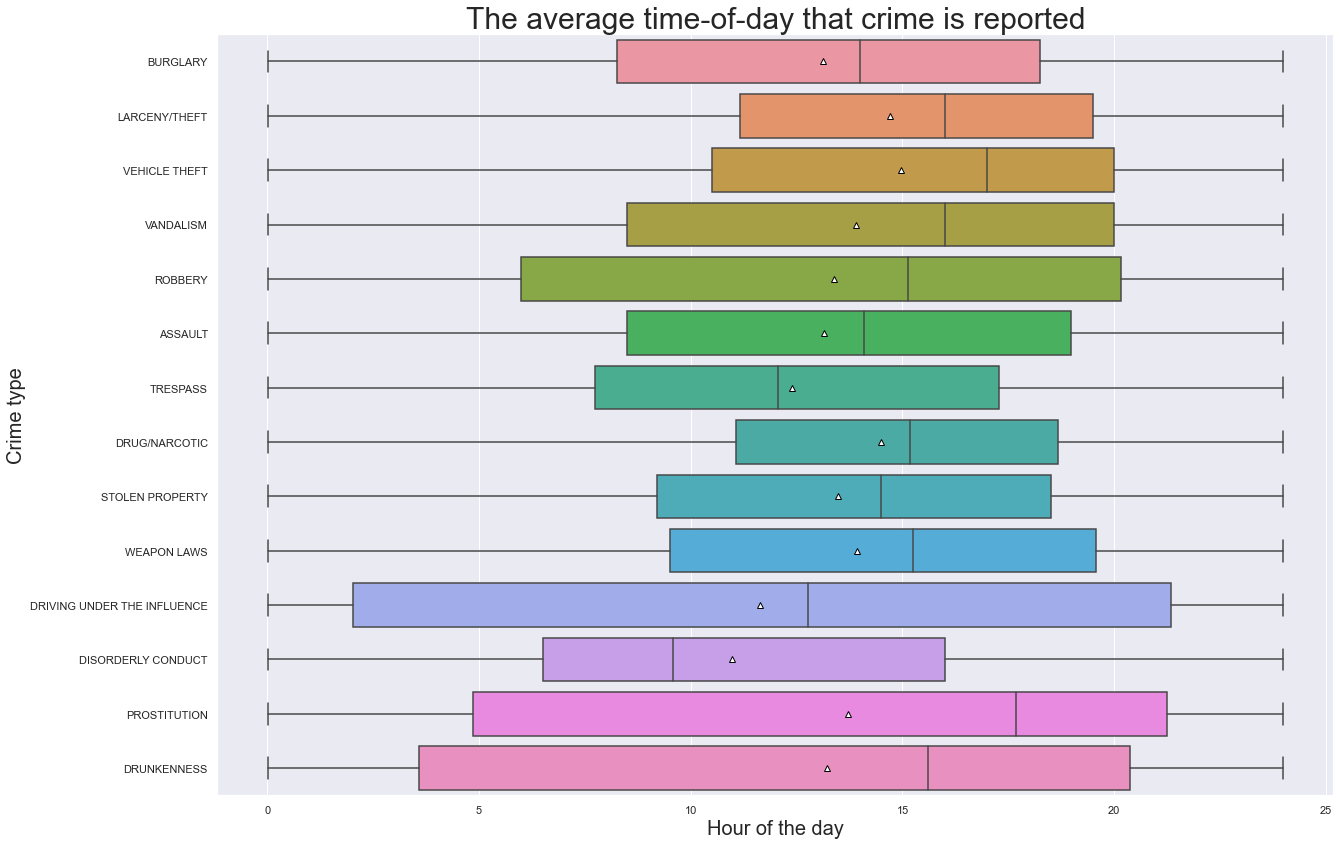

In [17]:
#Boxplot for all 15 crime types:
ax = sns.boxplot(x="Time_norm", y="Category", data=df, showmeans=True, meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
ax.set_title('The average time-of-day that crime is reported',fontsize=30)
ax.set_xlabel('Hour of the day',fontsize=20)
ax.set_ylabel('Crime type',fontsize=20)
sns.set(rc = {'figure.figsize':(16,10)})
plt.show()

<span style="color: navy;">

> - Based on the boxplot it is evident that the different types of crimes occur in different hours of the day. While the crimetype 'driving under the influence' has the broadest variance, the crimetype 'drug/narcotic' has a shorter time-range, primarily happening in the middle of the day. It is further evident that all types of crimes have observations throughout all hours of the day, but that the arrests to a higher extend happens in the middle of the day. 
    <br>
> - The interpretation of this box plot is different than that of the previous one because of the nature of the x-axis. Here we are looking at time in the form of hours in the day and thus the data is bound to the 24 hours in a day. Unlike the plot depicting the number of crimes, in this plot we see that the whiskers for each crime type align and that there are no outliers. 
    </span>

## PART 4: Visualizing geo-data

Let's now use the cool Folium functionalites `HeatMap` and `HeatMapWithTime` to create a visualization of the patterns of your favorite crime-type and how they change over time. 

**Note** The exercise below is a mix of exercise 1.2 (**but with the data you choose**) and 1.3 from Week 4.

> * Start by choosing a crimetype with spatial patterns that change over time. Use your data-exploration from the previous lectures to choose a good one.
> * Create a heatmap by grabbing your crimetype data across all times. Play with parameters to get plots you like and explain why you chose them and what the effect of these parameters are.

In [18]:
#Creating a subset of the dataframe containing the crimetype 'Drunkness'
df_drunk = df[df["Category"].isin(['DRUNKENNESS'])]
df_drunk = df_drunk.reset_index(drop=True)

In [19]:
# Extracting the locations of Drunkeness arrests
drunk_locations=zip(list(df_drunk.Y),list(df_drunk.X))

# Initiating the map and the parameters including style 
mymap=folium.Map([37.773972, -122.431297],tiles="Stamen Toner", zoom_start=13)
heat_data=drunk_locations
HeatMap(heat_data,blur=15, radius=12).add_to(mymap)
mymap

<span style="color: navy;"> 

**Comments on heatmap and heatmap parameters** <br> 
    
> * We chose to work with the category Drunkeness, as we have seen in the plots from exercise 1 that this is a crimetype that differs in frequency of arrests across district and time. We will elaborate this further in the section below after the the heatmap video of arrests. <br> <br> 
> * In the heatmap above, we use a black/white map, the "Stamen Toner", because the heat-visualization is easier to see when the bakcground does not have bright colors. We use a zoom of 13 as this gives a map that contain an overview of the whole ciy center, and then the reader can easily zoom in to get more detailed information. We used a "blur" of 15, which is a bit below the default level. A high blur level implies that it takes many close observations for color to change to be bright, and thus, for the "heat" to be visible. Low blur implies few observations, and thus, quick shift in colors of the heatmap. We use a radius of 13 which is a bit below the default level. The radius parameter refers to the size of the radius around each data point that is colored. We have a lot of datapoints for arrests of drunkeness, and in order to have a readable plot where everything is not a bright red color we make the radius a bit smaller, and then we can also see in more detail where the crimes are happening.
    </span>  

> * Now, choose a time-resolution. You could plot daily, weekly, monthly datasets to plot in your movie. Again the goal is to find interesting temporal patterns to display. We want at least 20 frames though. Create the movie using `HeatMapWithTime`.<
> * Comment on your results: 
>   - What patterns does your movie reveal?
>   - Motivate/explain the reasoning behind your choice of crimetype and time-resolution (you can also refer to exercises/visualizations that we have done in class to motivate your choice). 

In [20]:
# making column for hours to integers
df_drunk['Hours']=df_drunk['Hours'].apply(lambda x: int(x))
heat_data = [[[row['Y'],row['X']] for index, row in df_drunk[df_drunk['Hours'] == i].iterrows()] for i in range(0,24)]

In [21]:
mymap=folium.Map([37.773972, -122.431297],tiles="Stamen Toner", zoom_start=12)
# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(mymap)

# Display the map
mymap

<span style="color: navy;"> 

**Comments on heatmap-video of arrests of Drunkeness and heatmap parameters** <br> 
    
> - The heatmap video shows arrests of drunkeness during the 24 hours of the day at different locations in San Fransico. The first frame is the first hour of the day from 12 am to 1 am, and then the next frames are the following hours continuing to 11 pm to 12 am. From the video we see that the most arrests are in the late evening from appr. 10 pm to 3 am. These arrest are happening at different places in the city, and there are big clusters in the city center  
> - The variation of arrests of drunkeness across districts and times during the day might be because people more often go out to drink in the evening and during the night. Furthermore, the places where people go out are often clustered resulting in neigbourhoods with more pulsating nightlife, which are where people are more frequently arrested for drunkeness. For San Fransisco this is the neihourhoods called Mission and SoMa which are near the city center and the Union Square (San Francisco Nightlife by Neighborhood, 2019). This resembles the places highlighted in our heatmap as the most frequent places of arrests of drunkeness   

## Part 5: Errors in the data. 

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data. 

1. In the temporal activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/prostitution.png), where I've highlighted the phenomenon I'm talking about.
2. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/jitter.png), where I've highlighted the phenomenon I'm talking about.
3. And, during Week 4 we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/crime_hot_spot.png).

> *Exercise*: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below:
>
> * In each of the examples above, describe in your own words how the data-errors, I call attention to above, can bias the binned versions of the data. Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
> * Find your own example of human noise in the data and visualize it. Comment your results.

In [22]:
# Searching for duplicates in the data
df_prostitution = df[(df.Category == 'PROSTITUTION') & (df.DayOfWeek=='Thursday')]
pd.DataFrame(df_prostitution.groupby('IncidntNum')['Date'].count()).rename(columns={'Date':'Duplicates'}).sort_values('Duplicates', ascending=False).head(10)

,Duplicates
IncidntNum,
160771359,4
170159137,4
90210770,3
150268322,3
160709394,3
90823856,3
170692074,3
120289132,3
160710341,3


<span style="color: navy;"> 
    
**Description of how data errors can result in biases**
    
> - 1)  *Temporal activity for prostitution:* We only notice this because when we plot the incidents of prostitution with a lot of bins ie. a bin for each hour of the week, we see a suspeciously high increase in incidents at a specific time on Thursdays. In order to investigated this peak further, we decided to look into possible duplicates in the data as presented in the table above. Throug the table it is evident that some observations from Thursdays are actually duplicated up to four times. This appears to be due to human error, and it would therefore be a mistake to think that prostitution is more common on Thursdays. 
    
> - 2) *Timestamps of recorded crimes:* If we had not plotted the arrests by the minutes, but just plotted it by hours, we probably would not have noticed that according to the data the arrests happen irregularly. This does not mean that crimes happens more frequently on the hour, but instead this might be due to human error and the fact that it is easier to round the time to even numbers when reporting a crime. This is a bias that is important to be aware of, so the policemen do not think that they have to be more observant at certain times through an hour.    
    
> - 3) *Hotspot locations:* When we look up the address highlighted on the map as a hotspot for sexual offences, it appears to be a police station. Rather than assume that a lot of sexual offences happen at the police station, it might be prudent to consider that there is an issue with the data. A more plausible explanation might be that victims come to the station to report a crime, and in cases where they cannot or do not provide a specific location, the police station is simply noted as the location. This line of reasoning especially makes sense for sexual offense as with this crime a victim may not have been conscious during the crime. We would not have noticed this if we had not payed attention to specific locations of sexual offences. Nevertheless we deem it important to be aware of errors like this one, as it can have significant importance to point out the correct hotspots in the prevention of sexual offences and other types of crime.  


> * Find your own example of human noise in the data and visualize it. Comment your results.

In [23]:
# We make a subset of the data frame that only contain incidents from December
df_dec = df[df['Date_'].dt.month == 12]

# We make a column containing date_nr
df_dec['date_nr'] = df_dec['Date_'].dt.strftime('%d')
df_dec=df_dec.sort_values(by='date_nr')

#Grouping by date number and category:
crimes_per_date = pd.DataFrame(df_dec.groupby(['date_nr','Category'])['IncidntNum'].count().reset_index())

/var/folders/fv/rp4f73fd18qf99zv3lq7f0400000gn/T/ipykernel_18807/2654907326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dec['date_nr'] = df_dec['Date_'].dt.strftime('%d')


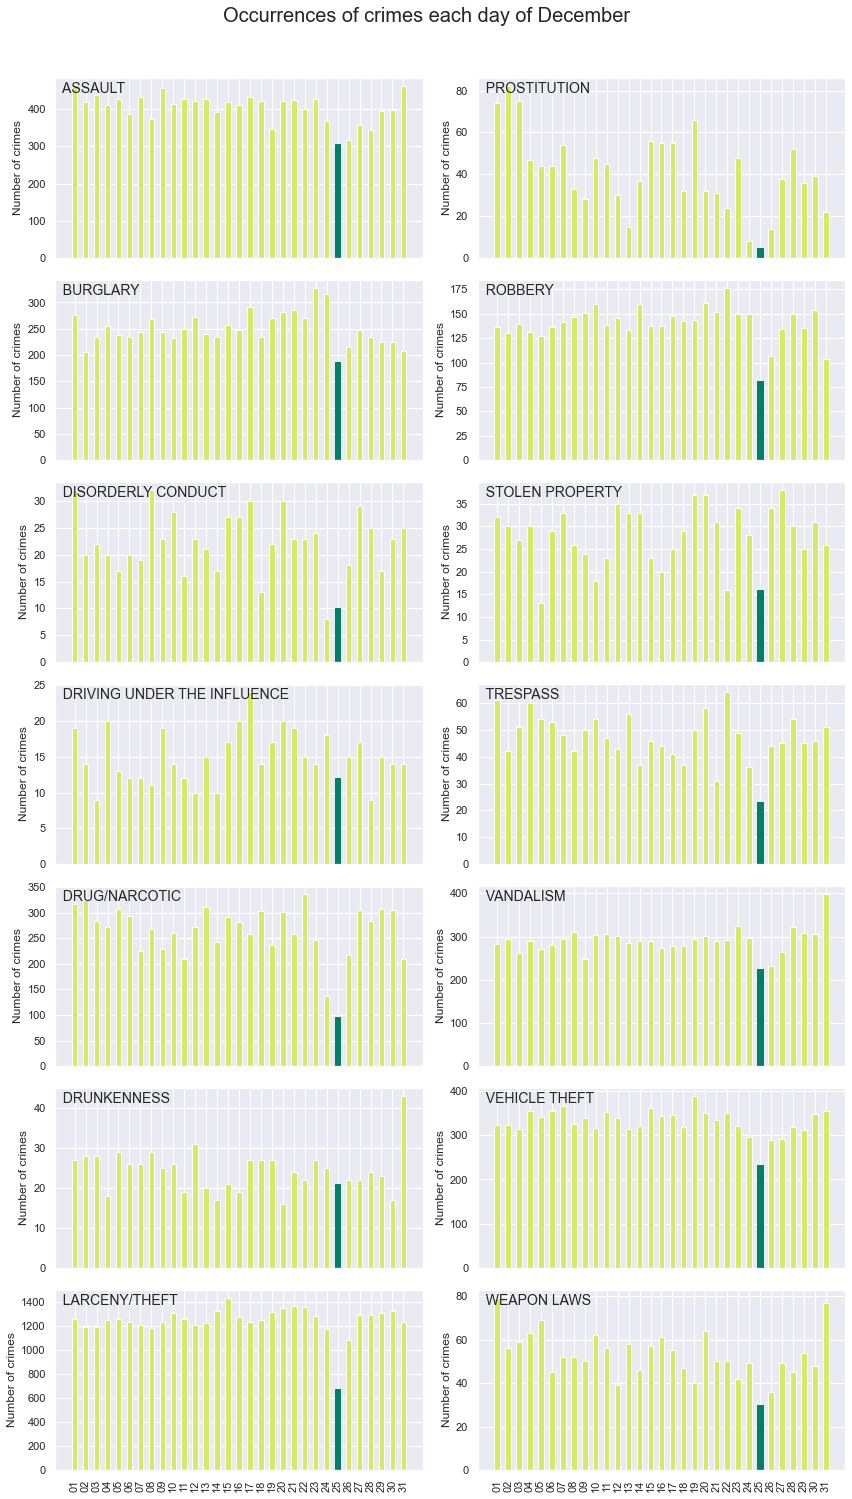

In [24]:
# Plotting data 

# Defining relevant parameters
cats = crimes_per_date.Category.unique()
n_days=len(set(df_dec.date_nr))

# Creating subplots of crime occurreces each day of December 
fig, ax = plt.subplots(7, 2, figsize=(12, 20), sharex=True)
for i, cat in zip(range(14), cats):
    if i < 7:
        axis=ax[i,0]
    if i>= 7:
        axis = ax[i-7,1]
        
    cat_df = crimes_per_date[crimes_per_date.Category==cat]
    
    # Setting parameters to make plots readable
    axis.set_title(('  '+cat),fontsize=14, y=0.88,loc='left')
    barlist=axis.bar(cat_df['date_nr'], cat_df['IncidntNum'],width=0.5, align='center',color='#d5ea66')
    # Highlighting 25th of December
    barlist[24].set_color('#008066')
    axis.tick_params(axis='x', labelrotation = 90)
    #axis.set_xlabel("Date in December")
    fig.tight_layout()
    axis.set_ylabel("Number of crimes")
fig.suptitle('Occurrences of crimes each day of December',y=1.04,fontsize=20)
plt.show()

<span style="color: navy;"> 
    
**Comments to our example of human noise in the data** 
    
> - In the barplots above we show all incidents of arrests for each of the focuscrimes in December. We have highlighted December 25th by coloring that specific bar in another color. This is to highlight that the number of arrests this day is lower than other days in December for all of the focuscrimes excerpt "Drunkeness" and "Driving under influence". The crime rates are in particular low for "Larceny/Theft", "Drug/Narcotic","Prostitution","Vehicle Theft", and "Tresspassing". The 25th of December is when Americans celebrate Christmas. It is difficult to tell whether these low crime rates mirrors reality by showing people are celebrating Christmas instead of engaging in criminal activities, or if there are other factors contributing to this iregularity. One could imagine several other contributing factors: <br>

>> - 1) There might be a lot of policemen at home with their families, and thus, fewer policemen on the street at Christmas resulting in fewer arrests. 
> >- 2) With regards to "Drug/Narcotic" there might be just as many incidents as other days in December, but maybe they do not get reported if the people doing drugs are in a different settings than they usually are, ie. if they are at home with their families instead of on the streets then the police might not be able to arrest them.
> > - 3) There might not actually be less instances of crimes within "Larceny/Theft", "Vehicle Theft", and "Tresspassing", meaning that the decrease in crime rates for these categories may be due to a lot of people not being at their own houses at Christmas as they are with their family. Thus, they do not discover that they have been victims of these crimes until they come home after Christmas and see that their house or car has been broken in to. In this case, the police reports the crime a few days later than when the crimes actually happen. When we look into it, it appears from the news that there are actually more instances of theft at Christmas than at other times (Christmas Crime: What You Need to Know, n.d.), which does not appear from the plots above. Thus, the irregularities in the data shown in the plots above might also be due to some human noise. 

### Reference List

Abate, T. (2017, July 10). By counting steps, researchers discover ‘activity inequality.’ Stanford University School of Engineering. https://engineering.stanford.edu/magazine/article/counting-steps-researchers-discover-activity-inequality

Azevedo, M. R., Araújo, C. L. P., Reichert, F. F., Siqueira, F. V., da Silva, M. C., & Hallal, P. C. (2007). Gender differences in leisure-time physical activity. International Journal of Public Health, 52(1), 8–15. https://doi.org/10.1007/s00038-006-5062-1

Christmas crime: What you need to know. (n.d.). Guardcover. https://www.guardcover.co.uk/articles/recent-posts/christmas-crime---what-you-need-to-know

Janert, P. K. (2010). Data Analysis with Open Source Tools: A Hands-On Guide for Programmers and Data Scientists (1st ed.). O’Reilly Media.

San Francisco Nightlife by Neighborhood. (2019, October 7). San Francisco Travel. https://www.sftravel.com/article/san-francisco-nightlife-neighborhood

Scheier, R. (2022, January 4). San Francisco confronts crime wave that divides neighborhood. Los Angeles Times. https://www.latimes.com/california/story/2022-01-03/san-francisco-property-crime-spikes

University of Exeter. (2009). Lifelong Gender Difference In Physical Activity Revealed. ScienceDaily. https://www.sciencedaily.com/releases/2009/01/090105190740.htm

Wikipedia contributors. (2022, February 1). Crime in San Francisco. Wikipedia. https://en.wikipedia.org/wiki/Crime_in_San_Francisco